In [1]:
import pandas as pd

tanaman = {
    'tinggi (cm)': [45, 60, 80, 75, 50, 55, 70, 65, 90],
    'berat (gram)': [150, 200, 250, 225, 180, 190, 210, 205, 260],
    'jenis': [
        'bunga', 'bunga', 'bunga', 'bunga', 'sayur', 'sayur', 'sayur', 'sayur',
        'sayur'
    ]
}

tanaman_df = pd.DataFrame(tanaman)
tanaman_df


,tinggi (cm),berat (gram),jenis
0,45,150,bunga
1,60,200,bunga
2,80,250,bunga
3,75,225,bunga
4,50,180,sayur
5,55,190,sayur
6,70,210,sayur
7,65,205,sayur
8,90,260,sayur


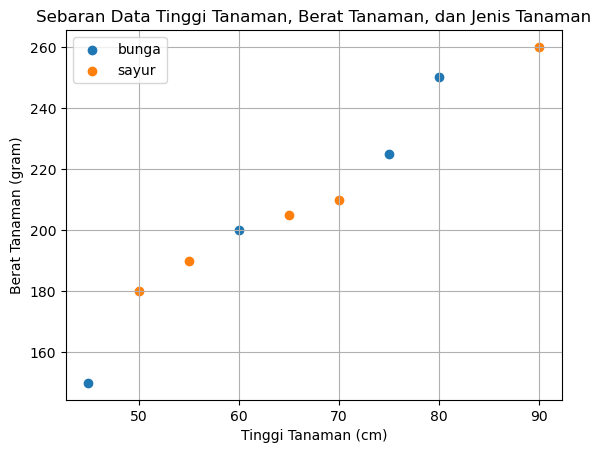

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jenis, data in tanaman_df.groupby('jenis'):
    ax.scatter(data['tinggi (cm)'], data['berat (gram)'], label=jenis)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Tanaman, Berat Tanaman, dan Jenis Tanaman')
plt.xlabel('Tinggi Tanaman (cm)')
plt.ylabel('Berat Tanaman (gram)')
plt.grid(True)
plt.show()

In [3]:
import numpy as np

X_train = np.array(tanaman_df[['tinggi (cm)', 'berat (gram)']])
y_train = np.array(tanaman_df['jenis'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 45 150]
 [ 60 200]
 [ 80 250]
 [ 75 225]
 [ 50 180]
 [ 55 190]
 [ 70 210]
 [ 65 205]
 [ 90 260]]

y_train: ['bunga' 'bunga' 'bunga' 'bunga' 'sayur' 'sayur' 'sayur' 'sayur' 'sayur']


In [7]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train).flatten()

print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


In [5]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


In [6]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
tinggi_tanaman = 150
berat_tanaman = 45

X_new = np.array([tinggi_tanaman, berat_tanaman]).reshape(1, -1)
X_new

array([[150,  45]])

In [17]:
y_new = model.predict(X_new)
y_new

array([1])

In [18]:
lb.inverse_transform(y_new)

array([1])

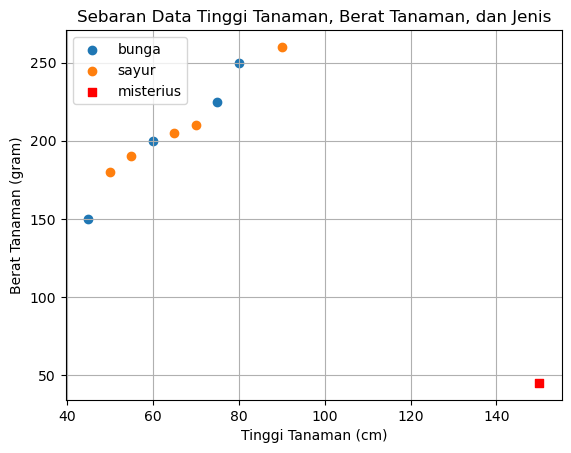

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jenis, data in tanaman_df.groupby('jenis'):
    ax.scatter(data['tinggi (cm)'], data['berat (gram)'], label=jenis)

plt.scatter(tinggi_tanaman,
            berat_tanaman,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Tanaman, Berat Tanaman, dan Jenis')
plt.xlabel('Tinggi Tanaman (cm)')
plt.ylabel('Berat Tanaman (gram)')
plt.grid(True)
plt.show()

In [21]:
misterius = np.array([tinggi_tanaman, berat_tanaman])
misterius

array([150,  45])

In [22]:
X_train

array([[ 45, 150],
       [ 60, 200],
       [ 80, 250],
       [ 75, 225],
       [ 50, 180],
       [ 55, 190],
       [ 70, 210],
       [ 65, 205],
       [ 90, 260]], dtype=int64)

In [23]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[148.49242404917499,
 179.2344832893492,
 216.6217902243447,
 195.0,
 168.00297616411441,
 173.34935823359717,
 183.3712082089225,
 181.1767093199344,
 223.21514285549716]

In [24]:
tanaman_df['jarak'] = data_jarak
tanaman_df_sorted = tanaman_df.sort_values(['jarak'])
tanaman_df_sorted

,tinggi (cm),berat (gram),jenis,jarak
0,45,150,bunga,148.492424
4,50,180,sayur,168.002976
5,55,190,sayur,173.349358
1,60,200,bunga,179.234483
7,65,205,sayur,181.176709
6,70,210,sayur,183.371208
3,75,225,bunga,195.000000
2,80,250,bunga,216.621790
8,90,260,sayur,223.215143


In [25]:
X_test_tanaman = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test_tanaman = np.array(['bunga', 'sayur', 'bunga', 'sayur'])

print(f'X_test:\n{X_test_tanaman}\n')
print(f'y_test:\n{y_test_tanaman}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
['bunga' 'sayur' 'bunga' 'sayur']


In [27]:
y_pred = model.predict(X_test_tanaman)
print(f'y_pred:\n{y_pred}')

y_pred:
[1 1 1 1]


In [29]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test_tanaman, y_pred)

print(f'Accuracy: {acc}')


Accuracy: 0.0


In [40]:
from sklearn.metrics import precision_score

prec = precision_score(y_test_tanaman, y_pred_labels, pos_label='sayur')

print(f'Precision: {prec}')

Precision: 0.5


In [52]:
from sklearn.metrics import recall_score

y_test = label_encoder.transform(y_test_tanaman)

rec = recall_score(y_test_encoded, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [53]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [50]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, zero_division=0)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

       bunga       0.00      0.00      0.00         2
       sayur       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



In [54]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
